In [1]:
%matplotlib notebook

import torch;
import torchvision;
import numpy as np;
import matplotlib.pyplot as plt;
from synthetic_data import generate_lorenz_data, SyntheticCalciumVideoDataset
from matplotlib.animation import FuncAnimation

/home/luke/anaconda2/envs/pytorch04/lib/python3.5/site-packages/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [2]:
data_dict = generate_lorenz_data(20, 65, 50, 100, save=False)
cells = data_dict['cells']
traces = data_dict['train_fluor']
train_ds = SyntheticCalciumVideoDataset(traces=traces, cells=cells)

Generating Lorenz data
Converting to rates and spikes
Converting to fluorescence
Train and test split
Saving to .//synth_data/lorenz_100


<IPython.core.display.Javascript object>


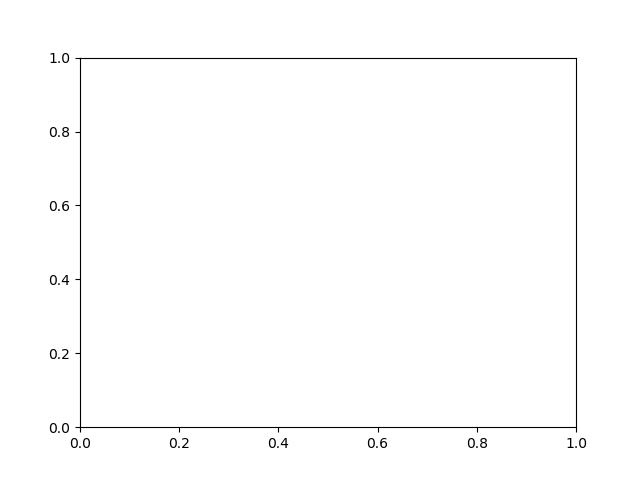

In [5]:
class data_to_video(object):
    def __init__(self, ax, data):
        self.data = data
        self.ax = ax
        
    def init(self):
        return self.ax.imshow(data[0])
    def __call__(self, i):
        if i == 0:
            return self.init()
        else:
            return self.ax.imshow(data[i])
        
fig, ax = plt.subplots()
V = data_to_video(ax, train_ds[0])
anim = FuncAnimation(fig, V, frames = np.arange(V.data.shape[0]), init_func=V.init, interval=100, blit=100)
plt.show()

In [6]:
from matplotlib.animation import ArtistAnimation
fig, ax = plt.subplots()

ims = []
    
for t in range(len(train_ds[0])):
    im = plt.imshow(train_ds[0][t], animated=True)
    ims.append([im])
    
    
ani = ArtistAnimation(fig, ims, interval=50, blit=True,
                      repeat_delay=1000)

<IPython.core.display.Javascript object>

TypeError: Invalid dimensions for image data